Стохастический градиентный спуск

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [99]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

# Искусственно-сгенерированные данные

Время обучения: 0.03623199462890625
MSE:  4.405289352409695
Коэффициенты:  [6.03573311 1.21887259 2.22592424 3.11625584 3.80437225 4.91690701]


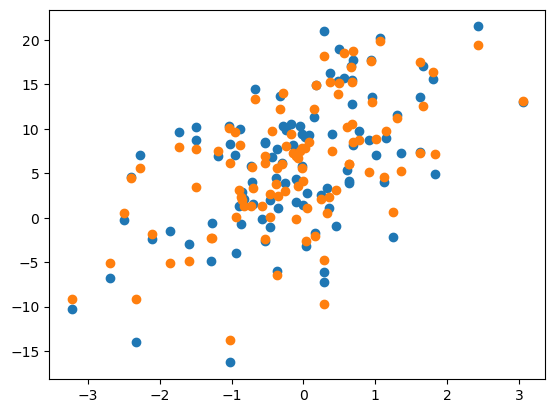

In [11]:
X = np.random.randn(100, 5)
y = X @ np.array([1, 2, 3, 4, 5]) + np.random.randn(100) * 2 + 6

start_time = time.time()
modelGD = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelGD.predict(X)
print("MSE: ", modelGD.MSE(X, y))
print("Коэффициенты: ", modelGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

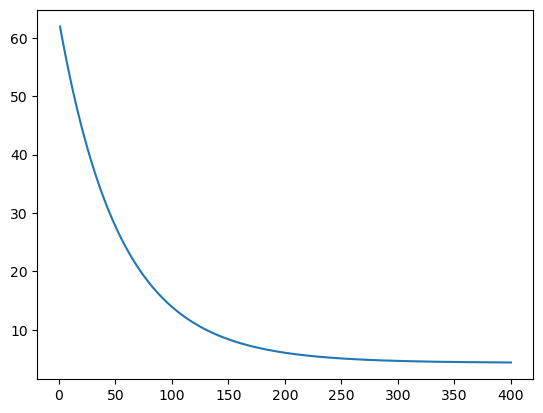

In [12]:
fig = plt.plot(steps, errors)

In [13]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # размер мини-батча 
        self.batch_size = batch_size  
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.019865751266479492
MSE:  4.3391819989949605
Коэффициенты:  [6.12333352 1.2975521  2.25904708 3.1213633  3.94802955 5.07650048]


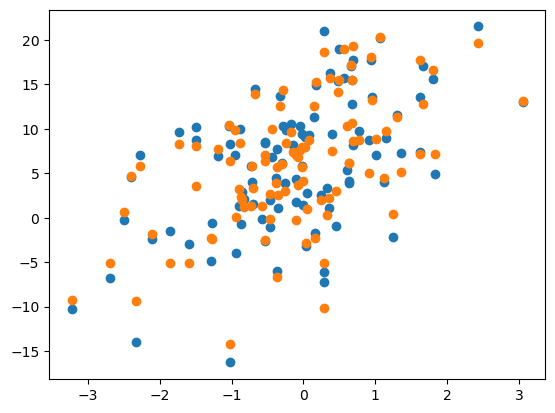

In [14]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=50, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelSGD.predict(X)
print("MSE: ", np.mean((y_pred - y) ** 2))
print("Коэффициенты: ", modelSGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

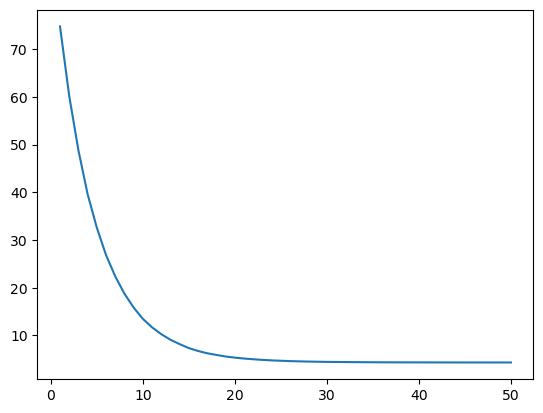

In [15]:
fig = plt.plot(steps, errors)

# Функция разделения данных 

In [2]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)
    
    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)
    
    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))
    
    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]
    
    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]
    
    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]
    
    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

# Работа с датасетом

In [96]:
from sklearn import datasets
import pandas as pd
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

# Создание нового столбца, содержащего целевую переменную 'y' 
# (количественный показатель прогрессирования заболевания
# через год после исходного уровня)
df['diabetes_measure'] = diabetes.target
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(df.head())
x_train, y_train, x_test, y_test = train_test_split_(X, y, test_size = 0.3, random_state = 123)
x_train1 = np.hstack((np.ones((x_train.shape[0], 1)), x_train)) 
x_test1 = np.hstack((np.ones((x_test.shape[0], 1)), x_test)) 


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_measure  
0 -0.002592  0.019907 -0.017646             151.0  
1 -0.039493 -0.068332 -0.092204              75.0  
2 -0.002592  0.002861 -0.025930             141.0  
3  0.034309  0.022688 -0.009362             206.0  
4 -0.002592 -0.031988 -0.046641             135.0  


Реализуем L2-регуляризацию с помощью прямых вычислений:
\begin{align}w &= (X^TX + \lambda I_d)^{-1}X^Ty\end{align}

l, MSE_test - MSE_train:
1e-20 99.62520656137667
2.5353644939701167e-20 99.62520656137667
6.428073117284345e-20 99.62520656137667
1.6297508346206402e-19 99.62520656137667
4.1320124001153346e-19 99.62520656137667
1.0476157527896661e-18 99.62520656137667
2.6560877829466947e-18 99.62520656137667
6.734150657750801e-18 99.62520656137667
1.7073526474706886e-17 99.62520656137667
4.328761281083062e-17 99.62520656137667
1.097498765493059e-16 99.62520656137804
2.782559402207126e-16 99.62520656137622
7.054802310718631e-16 99.62520656137758
1.788649529057435e-15 99.62520656137531
4.534878508128591e-15 99.62520656137667
1.1497569953977357e-14 99.62520656137758
2.9150530628251696e-14 99.6252065613694
7.390722033525775e-14 99.62520656135666
1.8738174228603867e-13 99.62520656133165
4.750810162102794e-13 99.62520656126662
1.2045035402587836e-12 99.62520656109427
3.0538555088334124e-12 99.62520656066226
7.742636826811278e-12 99.62520655956314
1.9630406500402685e-11 99.62520655678054
4.977023564332114e-1

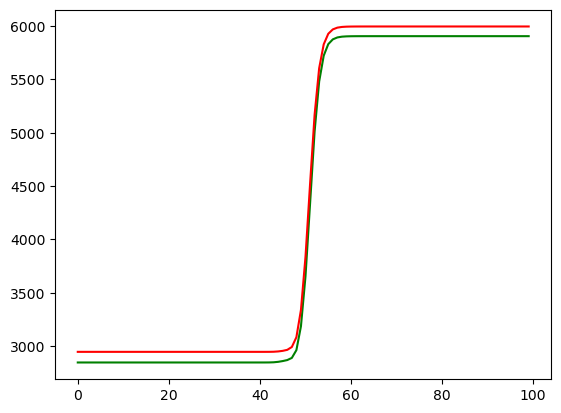

In [97]:
train_scores, test_scores = [], []
id = np.eye(x_train.shape[1]+1)
id[0][0] = 0
print("l, MSE_test - MSE_train:")
for l in np.logspace(-20, 20, 100):
    w = np.linalg.inv(x_train1.T @ x_train1 + l*id) @ x_train1.T @ y_train
    MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
    train_scores.append(MSE_train)
    MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
    test_scores.append(MSE_test)
    print(l, MSE_test - MSE_train)
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')

start_time = time.time()
w = np.linalg.inv(x_train1.T @ x_train1 + 0.038*id) @ x_train1.T @ y_train
MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
print("Время обучения:", time.time() - start_time)
print("MSE_train, MSE_test", MSE_train, MSE_test)
print("Коэффициенты: ", w)
print("np.linalg.det(x_train.T @ x_train): ", np.linalg.det(x_train1.T @ x_train1))
print("np.linalg.det(x_train.T @ x_train + 0.43287*id): ", np.linalg.det(x_train1.T @ x_train1 + 0.43287*id))

**Градиентый спуск**

Время обучения: 0.39694738388061523
MSE_train:  3060.3749576883133
MSE_test:  3187.0956124244867
Коэффициенты:  [ 152.69076152   42.39985986  -97.23634027  374.87515265  217.48366499
   -7.98664919  -39.07988943 -191.9602773   161.10082192  284.13524376
  158.81117188]


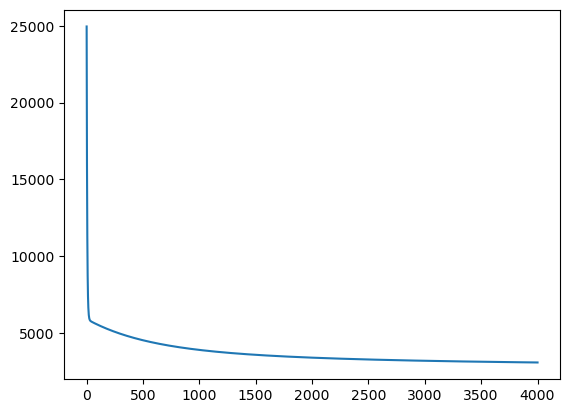

In [100]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(steps, errors)

**SGD 400 bs = 8**

Время обучения: 0.2765841484069824
MSE_train:  2874.46254426805
MSE_test:  2959.6134711331865
Коэффициенты:  [ 151.5491199    13.4797293  -242.17776999  533.74946446  266.9014214
  -74.58966891 -117.80983904 -206.82247501  169.24586581  390.33279364
  120.62468385]


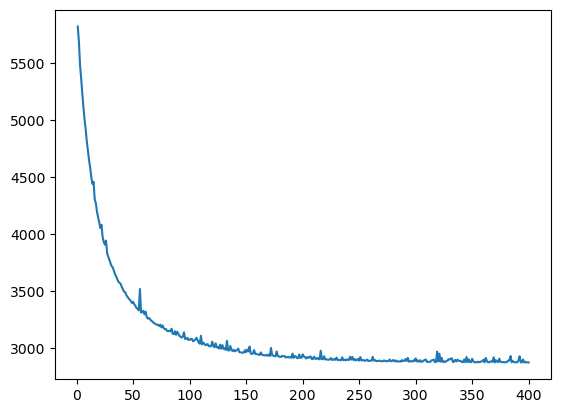

In [101]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

**SGD 40000 bs = 8**

Время обучения: 22.55317735671997
MSE_train:  2849.01077999237
MSE_test:  2952.885736059851
Коэффициенты:  [ 154.02469695    9.47128162 -261.28918569  540.27139365  275.24277731
 -810.919927    441.85906458  135.59908348  294.83540483  669.61255537
  101.81578562]


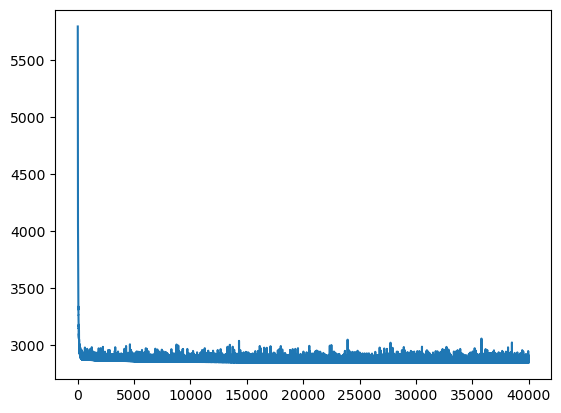

In [102]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

**SGD 40000 bs = 32**

Время обучения: 7.841825246810913
MSE_train:  2852.289168636006
MSE_test:  2948.153767786865
Коэффициенты:  [ 151.66723981   12.01618311 -259.00967847  545.46339106  272.58316996
 -500.7861648   192.63646452    2.98387731  262.3221108   553.06460493
  102.0387077 ]


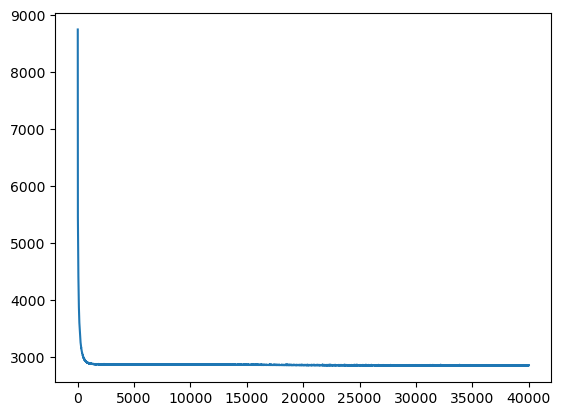

In [24]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Видим, что у стохастического градиентного спуска качество выше, разрыв в качестве на обучающей и тестовой выборке меньше, время выполнения меньше, и чем у обычного градиентного спуска, и чем у прямых вычислений с L2-регуляризацией! При этом стохастический градиентный спуск работает более "шумно". Многое зависит и от оптимального подбора размера мини-батча.

мой коммент

Следует отметить одну вещь: поскольку SGD обычно более шумный, чем типичный градиентный спуск, для достижения минимумов обычно требуется большее количество итераций из-за случайности в его спуске. Несмотря на то, что для достижения минимумов требуется большее количество итераций, чем при типичном градиентном спуске, в вычислительном отношении он все равно намного дешевле, чем типичный градиентный спуск.



<b>Домашнее задание</b>

Объясните, почему коэффициенты всех построенных моделей сильно отличаются между собой.

Сравните скорость и качество обучения моделей регрессии с помощью обычного и стохастического градиентного спуска на наборе данных housing.csv.

In [26]:
data = pd.read_csv('housing.csv')
data.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column96,Column97,Column98,Column99,Column100,Column101,Column102,Column103,Column104,Y
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2


# Разделение на тестовую и тренировочную выборки

In [27]:
x = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [28]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)
    
    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)
    
    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))
    
    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]
    
    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]
    
    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]
    
    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

In [29]:
x_train, y_train, x_test, y_test = train_test_split_(x, Y, 0.2, 123)
display(x_test)

array([[5.74683028e-01, 0.00000000e+00, 6.46627566e-01, ...,
        3.30527864e-05, 1.32941284e-03, 5.34701816e-02],
       [5.73564896e-04, 0.00000000e+00, 1.47727273e-01, ...,
        9.76936195e-01, 1.30914017e-01, 1.75430902e-02],
       [3.31123297e-04, 2.00000000e-01, 1.05205279e-01, ...,
        9.52221249e-01, 5.46609006e-02, 3.13773092e-03],
       ...,
       [1.59458459e-02, 0.00000000e+00, 7.00879765e-01, ...,
        8.42397924e-01, 1.43346432e-01, 2.43925096e-02],
       [3.79791453e-04, 8.00000000e-01, 3.88563050e-02, ...,
        1.00000000e+00, 6.48454746e-02, 4.20493558e-03],
       [2.78858418e-04, 0.00000000e+00, 1.44061584e-01, ...,
        9.44020633e-01, 2.35931118e-01, 5.89642754e-02]])

# Градиентный спуск

In [37]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

# Стохастический градиентный спуск

In [38]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # размер мини-батча 
        self.batch_size = batch_size  
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.8322656154632568
MSE_train:  9.504537846879806
MSE_test:  18.28112462247962
Коэффициенты:  [ 10.31299072  -0.27994349  -1.79952413   1.80920975  -0.97908405
   2.71640472  11.28875116   2.66128149  -5.03816183   6.94383261
   2.01671927   2.24067      7.1861045   -0.57497709   0.28129692
  -0.81997616  -1.6657503    1.06727529  -1.86698226  -1.04840316
  -1.96771012   0.42085417  -1.71929474  -1.86553078  -0.31091037
  -3.35035402  -1.65567608   3.37361965  -0.49334485   0.61186046
  -0.16956462   3.57249558  -0.48420261   0.84243909  -1.26324704
  -2.01935038  -0.31353522  -1.56971321  -0.42113309   2.91765037
   0.15600727   1.18560576  -4.54649477   3.05387919  -3.89965373
   3.49273502   3.238344    -3.22163235  -0.30925627  -4.36291924
   0.23810812  -2.20718371   3.07334897  -1.17382156  -1.25832764
   2.39903306   4.11305161   1.47001427  -0.77234193  -1.62559874
  -1.56095839  -2.64399297  -3.16265084  -0.04316074  -2.67758797
  -1.90771495  -5.01066211  -0.30

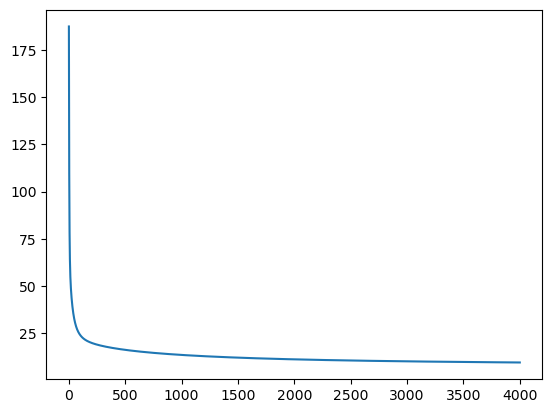

In [39]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(steps, errors)

Время обучения: 0.15219545364379883
MSE_train:  9.3116858607943
MSE_test:  18.755020406691617
Коэффициенты:  [ 1.16043686e+01 -5.73744875e-01 -3.69591078e-01  2.18280103e+00
  2.11470461e-01  1.73874239e+00  1.07083771e+01  3.21760139e+00
 -4.36685271e+00  8.57523953e+00  3.70587090e-01  1.30712451e+00
  6.55458668e+00 -5.27698031e-01 -6.29008504e-01 -4.09131645e-01
 -8.64926325e-01 -4.40451589e-02 -1.53402469e+00 -2.74890731e+00
 -2.11146820e+00 -8.72313244e-01 -1.78612596e+00 -1.52669760e+00
  4.31226755e-01 -3.75280688e+00  3.64505198e-01  3.76399175e+00
 -1.97679276e+00 -4.66478384e-01  8.29665456e-01  3.19864791e+00
 -1.05889004e+00 -1.67055846e+00 -2.06923043e+00  5.47336183e-01
  1.76068261e-02 -2.33032472e+00 -1.89916204e+00  4.14816782e+00
  8.65917632e-01  7.40970777e-01 -2.85523179e+00  2.07570204e+00
 -3.73130476e+00  1.53451481e+00  4.15526362e+00 -4.21684069e+00
 -1.20406724e+00 -5.13168267e+00 -1.68749862e+00 -2.19627287e+00
  2.24887988e+00 -1.80296455e+00 -1.38602927e-

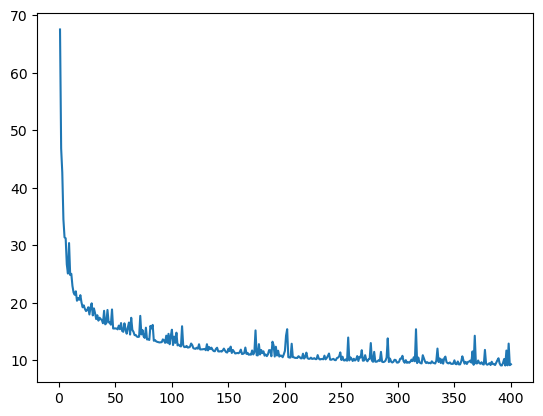

In [75]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

**Градиентный спуск:**

Скорость обучения ~ 0.832

Качество (MSE train) ~ 9.5

Качество (MSE train) ~ 19.28

**Стохастический градиентный спуск:**

Скорость обучения ~ 0.158

Качество (MSE train) ~ 9.138

Качество (MSE train) ~ 17.767

SGD в 5 раз быстрее GD. MSE на обучающей выборке в обоих случаях примерно одинаковая, на тестовой при SGD она снизилась, но все равно практически в 2 раза больше, чем на тренировочной

Подберите в цикле оптимальное, с Вашей точки зрения, значение размера мини-батча и поясните Ваш выбор.

In [79]:
#from sklearn.model_selection import GridSearchCV
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=4000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # размер мини-батча 
        self.batch_size = batch_size  
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()
    
    def grid_search(self, X_train, y_train, X_val, y_val, batch_sizes):
        best_batch_size = None
        best_mse = float('inf')

        for batch_size in batch_sizes:
            self.batch_size = batch_size
            steps, errors = self.fit(X_train, y_train)
            mse_val = self.MSE(X_val, y_val)

            if mse_val < best_mse:
                best_mse = mse_val
                best_batch_size = batch_size

        return best_batch_size, best_mse



model = LinearRegressionSGD()
best_batch_size, best_mse = model.grid_search(x_train, y_train, x_test, y_test,  batch_sizes=[2, 4, 8, 16, 32, 64, 128, 256])

print(best_batch_size, best_mse)


32 17.936070878201154


Время обучения: 0.25677490234375
MSE_train:  9.131839627626034
MSE_test:  17.859817504387504
Коэффициенты:  [ 12.26094247   0.74182164  -2.50695013   0.61217593   0.4821198
   1.64016155  11.5101347    3.49857862  -5.66436302   6.6975532
  -0.21359232   2.6531612    5.45506712   0.29008403  -0.44206083
   2.56948283  -1.17557965   0.39977537  -2.80815771  -2.67454288
  -1.93714901  -0.22074768  -0.24180798  -2.67299371  -0.70596408
  -4.24974575   0.17361134   4.31886234  -1.05391467   1.87918807
  -0.41647327   3.8473003   -0.77706786  -1.68018242  -0.7793087
  -0.33076926  -1.05686192  -0.77792258   0.37823871   3.08880375
   2.88800318   1.69129599  -3.19778451   3.36656569  -4.38644278
   1.5927037    1.93351144  -4.1314872    0.84139172  -6.10860144
  -1.72439432  -4.29337423   0.66366022   0.03352201  -0.84674685
   3.23269429   2.82752519   1.07256883   0.16396441  -1.98149017
  -2.11213386  -3.30727511  -3.83475188  -2.30537748  -1.88169553
  -1.249147    -5.34681397   2.246420

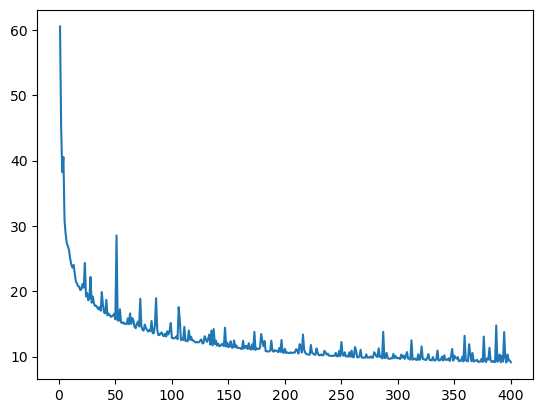

In [81]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Реализуйте в классе LinearRegressionSGD стохастический градиентный спуск с регуляризацией L1, L2, ElasticNet и подберите оптимальные параметры регуляризации, чтобы сократить разрыв качества на обучающей и тестовой выборке.

In [90]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # размер мини-батча 
        self.batch_size = batch_size  
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y, reg_type = None, l1 = None, l2 = None):
        self.X = X.copy()
        self.y = y.copy()
        self.reg_type = reg_type
        self.l1 = l1
        self.l2 = l2
        
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                
                if reg_type == 'L1':
                    grad += self.L1_reg(self.theta)
                elif reg_type == 'L2':
                    grad += self.l2_regularization(self.theta)
                elif reg_type == 'ElasticNet':
                    grad += self.elastic_net_regularization(self.theta)
                
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
    
    def L1_reg(self, theta):
        return self.l1 * np.sign(self.theta)
    
    def l2_regularization(self, theta):
        return 2 * self.l2 * self.theta

    def elastic_net_regularization(self, theta):
        return (2 * self.l2 * self.theta) + (self.l1 * np.sign(self.theta))
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

# L1

MSE_train:  10.644785369905657
MSE_test:  20.38175453533481
Коэффициенты:  [ 1.49570899e+01 -1.09535231e+00 -7.39531841e-03 -3.21832452e-03
 -2.57277438e-02 -3.18206704e-02  6.94661208e+00  1.17304289e+00
 -3.54991263e+00  7.34439514e+00 -6.13676135e-03 -1.28775898e-02
  4.22305774e+00 -1.75083637e-02 -1.74343327e-01  8.20111154e-04
 -1.03529880e+00 -8.24984161e-04 -1.83095790e+00 -4.66289919e-03
 -7.04836743e-01  2.22438599e-04 -1.19711806e+00 -5.77437536e-01
 -7.25889133e-01 -3.52888783e+00 -6.57617367e-03  9.11068852e-01
 -1.49846618e-03 -1.61933899e-03 -8.00744380e-04  1.82194038e+00
 -6.72064197e-03  1.50024145e-03 -2.31435196e-03 -3.60675171e-03
 -3.36416305e-05 -6.76476106e-03 -3.68910707e-04  2.02208973e+00
 -1.15266574e-02 -1.64399370e-02 -9.48250424e-01  1.25144090e+00
 -2.56766843e-01  1.63276839e-01  2.53053181e+00 -7.93727162e-02
 -8.58927510e-03 -2.94857083e+00 -2.66057052e-02 -6.19972926e-01
 -4.69830550e-03 -2.37017551e-02 -5.64691495e-03  1.38321642e+00
  1.92771621e+0

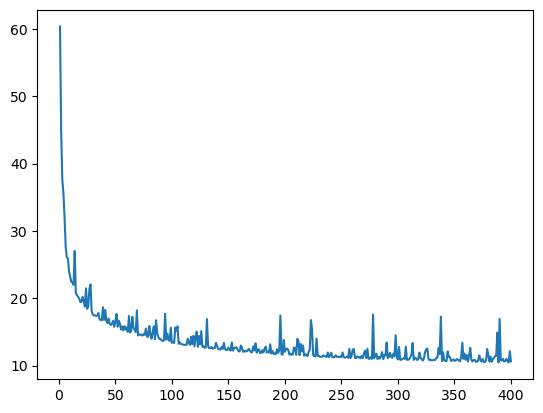

In [91]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg_type = 'L1', l1 = 0.01)
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

# L2

MSE_train:  10.721471069389127
MSE_test:  19.562130253953143
Коэффициенты:  [ 1.17139780e+01 -8.25896752e-01 -9.47139654e-01  2.09174865e+00
 -9.13064503e-01  1.56354484e+00  9.49890155e+00  3.34574698e+00
 -3.27538728e+00  5.53063470e+00  2.23918073e-01  1.24533330e+00
  6.08294698e+00 -2.16327119e+00 -4.85592869e-01 -7.78497093e-01
 -4.91796711e-01  4.85801930e-01 -1.08706222e+00 -1.89023768e+00
 -1.09116922e+00 -7.13950514e-01 -1.81878740e+00 -9.52837763e-01
 -1.66378567e+00 -3.55382348e+00 -3.23691947e-01  2.53377785e+00
 -1.07895915e+00  1.18411359e+00  2.07470232e-01  2.95840780e+00
 -8.74392415e-01 -5.76174931e-01 -6.61733528e-01 -1.10352338e+00
 -4.04009337e-01  3.87054981e-02 -1.07174173e+00  2.41592642e+00
  8.72473383e-01  7.06708450e-01 -3.20394881e+00  2.37964463e+00
 -3.35736817e+00  1.07485259e+00  2.62684611e+00 -2.87934810e+00
 -4.23472595e-01 -3.94738991e+00 -2.86546990e-01 -2.26817470e+00
  1.89385246e+00 -2.89343001e-01 -3.61160556e-01  2.18269397e+00
  2.83857303e+

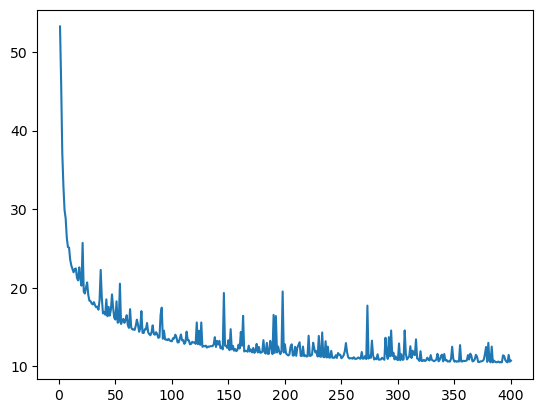

In [92]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg_type = 'L2', l2 = 0.001)
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

# Elastic Net

MSE_train:  10.8255005378719
MSE_test:  19.348901769175715
Коэффициенты:  [ 1.17022924e+01 -7.08529606e-01 -5.61316735e-01  1.55834862e+00
 -5.68078789e-01  1.04428258e+00  9.98934020e+00  3.22416309e+00
 -3.06782251e+00  5.45529913e+00  5.18946579e-01  1.17731709e+00
  6.42624282e+00 -1.03302274e+00 -5.88678177e-01  4.05306754e-05
 -7.76355028e-01 -3.69070794e-01 -1.67161964e+00 -1.32742069e+00
 -1.12159107e+00 -5.19735166e-04 -1.61713789e+00 -1.20431671e+00
 -8.42178963e-01 -3.39966070e+00 -4.07375118e-01  2.31766118e+00
 -1.14677140e+00  9.21402701e-01 -7.09025123e-03  3.39278971e+00
 -7.17093745e-01 -4.45266304e-01 -3.17108876e-01 -4.16940606e-01
 -4.65655630e-01 -5.08292923e-01 -6.35807100e-01  2.45338097e+00
  1.29004360e+00  8.68968828e-01 -2.85021137e+00  1.95478482e+00
 -3.02563973e+00  1.82382836e+00  2.40637278e+00 -2.50960705e+00
  1.04626360e-02 -3.79782281e+00 -7.58801310e-02 -2.21207942e+00
  1.39291828e+00 -4.54004151e-01 -3.67740349e-01  2.17469033e+00
  2.38517458e+00

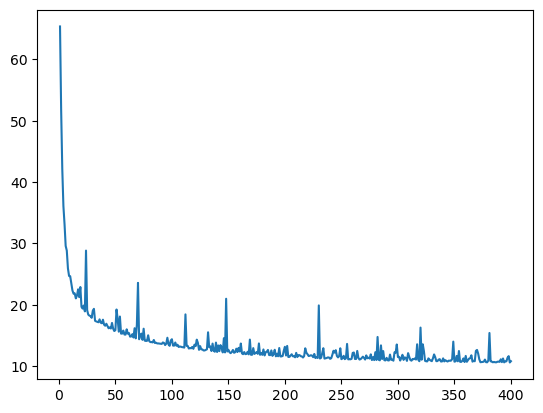

In [93]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg_type = 'ElasticNet', l1 = 0.001, l2 = 0.001)
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)